In [20]:
import numpy as np
from matplotlib import pyplot as plt
import h5py


file=['/Users/localuser/Research/EMDNA/downscale/MERRA2/MERRA2_prcp_2018.mat',
      '/Users/localuser/Research/EMDNA/downscale/MERRA2/MERRA2_tmin_2018.mat',
      '/Users/localuser/Research/EMDNA/downscale/MERRA2/MERRA2_tmax_2018.mat']
data = [' ']*3
for i in range(3):
    f = h5py.File(file[i], 'r')
    datatemp = {}
    for k, v in f.items():
        datatemp[k] = np.array(v)
    dataori = datatemp['data']
    dataori = np.transpose(dataori, [2, 1, 0])
    data[i] = np.nanmean(dataori,axis=2)

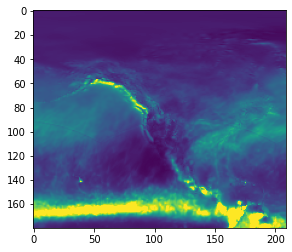

In [23]:
plt.imshow(data[0])
plt.clim([0,10])

In [44]:
file=['/Users/localuser/Research/EMDNA/downscale/ERA5/ERA5_ds_prcp_2018.npz',
      '/Users/localuser/Research/EMDNA/downscale/MERRA2/MERRA2_ds_prcp_2018.npz',
      '/Users/localuser/Research/EMDNA/downscale/JRA55/JRA55_ds_prcp_2018.npz']

titles=['ERA5','MERRA2','JRA55']

lontar = np.arange(-180 + 0.05, -50, 0.1)
lattar = np.arange(85 - 0.05, 5, -0.1)
nrows = len(lattar)
ncols = len(lontar)
data = np.nan * np.zeros([nrows, ncols, 3])
for i in range(3):
    d=np.load(file[i])
    data[:,:,i]=np.nanmean(d['data'][:,:,31:59],axis=2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


IndexError: index 2 is out of bounds for axis 2 with size 2

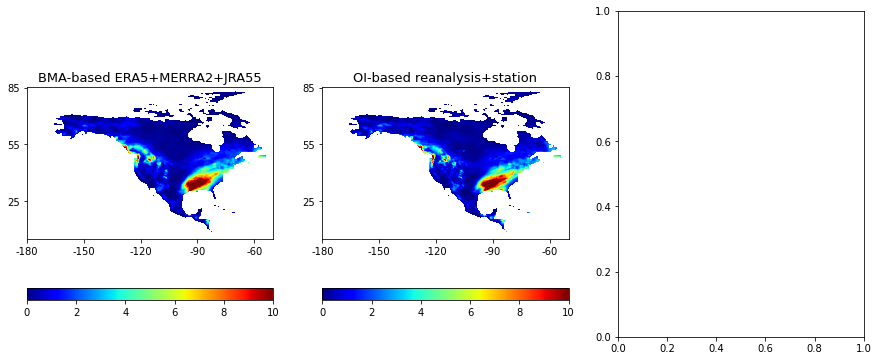

In [62]:
lonplt = np.arange(-180 , -50+0.01, 0.1)
latplt = np.arange(85, 5-0.01, -0.1)
plt.figure(figsize=[15,6])
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(data[:,:,i],cmap='jet')
    cax=plt.colorbar(orientation='horizontal',extend='neither')
    plt.clim([0,10])
    plt.title(titles[i],fontsize=13)
    plt.xticks(np.arange(0,1300,300),np.int32(lonplt[np.arange(0,1300,300)]))
    plt.yticks(np.arange(0,800,300),np.int32(latplt[np.arange(0,800,300)]))
plt.savefig('Raw_rea.png',dpi=400,format='png')

In [54]:
data = np.nan * np.zeros([nrows, ncols, 2])
file='/Users/localuser/Research/EMDNA/merge/bmamerge_prcp_201802.npz'
d=np.load(file)
data[:,:,0]=np.nanmean(d['bma_data'],axis=2)

file='/Users/localuser/Research/EMDNA/oimerge/oimerge_prcp201802.npz'
d=np.load(file)
data[:,:,1]=np.nanmean(d['oi_value'],axis=2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


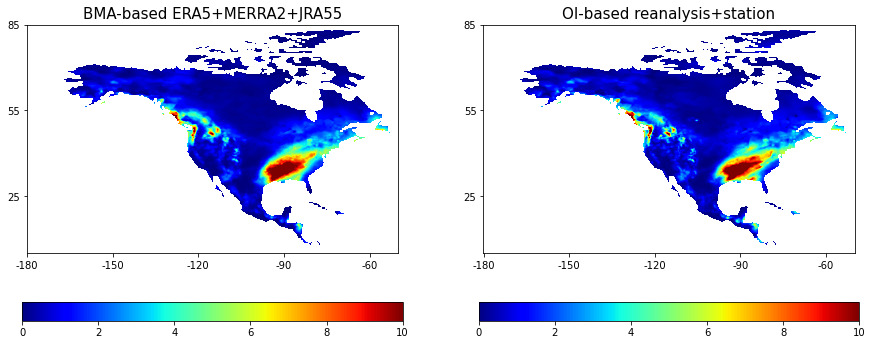

In [61]:
titles=['BMA-based ERA5+MERRA2+JRA55','OI-based reanalysis+station']
lonplt = np.arange(-180 , -50+0.01, 0.1)
latplt = np.arange(85, 5-0.01, -0.1)
plt.figure(figsize=[15,6])
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(data[:,:,i],cmap='jet')
    cax=plt.colorbar(orientation='horizontal',extend='neither')
    plt.clim([0,10])
    plt.title(titles[i],fontsize=15)
    plt.xticks(np.arange(0,1300,300),np.int32(lonplt[np.arange(0,1300,300)]))
    plt.yticks(np.arange(0,800,300),np.int32(latplt[np.arange(0,800,300)]))
plt.savefig('Merge_data.png',dpi=400,format='png')